In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../out/generalization/4uc51x21.csv")
df.head()

,simulation_idx,step_idx,mse,cardinality_target,cardinality_output,cardinality_truth,ospa_kmeans,scale
0,0,0,0.000028,10.995141,8.686443,11,145.109460,1
1,0,1,0.000030,11.958359,7.868010,12,156.874161,1
2,0,2,0.000036,10.786115,7.687696,11,126.501279,1
3,0,3,0.000021,9.902283,5.409025,10,224.106685,1
4,0,4,0.000023,10.786720,6.415661,11,214.314662,1


In [3]:
df.groupby("scale").mean()

,simulation_idx,step_idx,mse,cardinality_target,cardinality_output,cardinality_truth,ospa_kmeans
scale,,,,,,,
1,49.5,49.5,0.000024,9.756213,7.635493,9.8452,228.319363
2,49.5,49.5,0.000015,10.014710,30.233724,39.9272,232.338814
3,49.5,49.5,0.000017,10.107921,67.283211,90.2938,246.050966


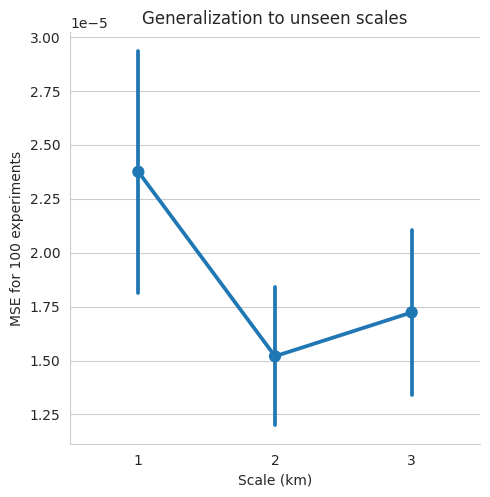

In [4]:
data = df.groupby(by=["scale", "simulation_idx"]).mean().drop(columns=["step_idx"]).reset_index()
sns.catplot(data=data, x="scale", y="mse", kind="point", errorbar=("sd", 1))
plt.ylabel("MSE for 100 experiments")
plt.xlabel("Scale (km)")
plt.title("Generalization to unseen scales")
plt.show()

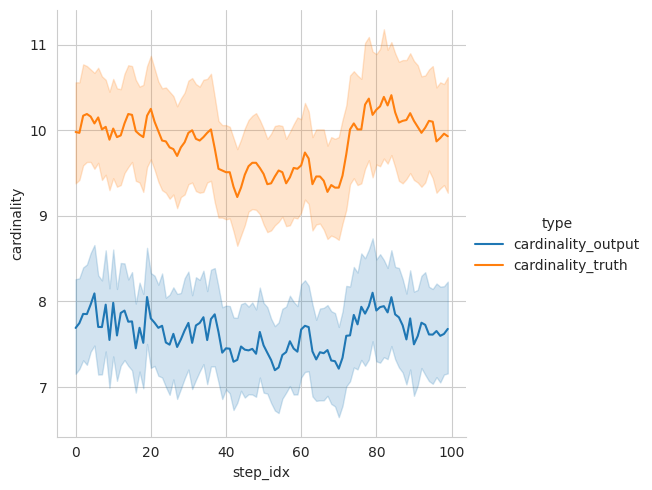

In [15]:
data = df.query("scale == 1").melt(id_vars=["step_idx"], value_vars=["cardinality_output", "cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="type", kind="line")

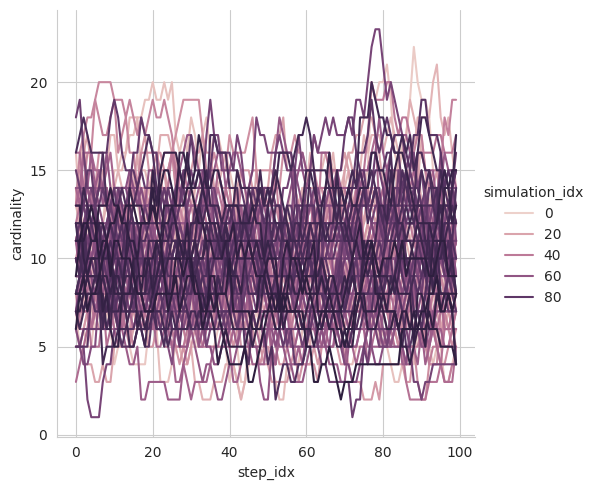

In [6]:
data = df.query("scale == 1").melt(id_vars=["step_idx", "simulation_idx"], value_vars=["cardinality_truth"], var_name="type", value_name="cardinality")
sns.relplot(data=data, x="step_idx", y="cardinality", hue="simulation_idx", kind="line")